In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import glob as glob                                            # grabbing file names
import pandas as pd                                            # making dataframe for exporting parameters
import numpy as np                                             # basic math
import skimage.io as io                                        # reading in images
import os
import trackpy as tp             # particle tracking toolbox
%matplotlib notebook
import matplotlib.pyplot as plt  # for plotting everything
from matplotlib import cm, colors
from tcell_migration import *
import subprocess                                  # for executing commands from the terminal


# Parameters

In [2]:
feature_size = 11
minmass = 2500
separation = 3
max_search_range = 8
num_skipped_frames = 0
min_track_length = 5
frame_duration = 15
um_per_pixel = 1.1

In [3]:
filename = 'Position_1.tif'


In [4]:
#read in the imsage stack
imstack = io.imread(filename)


<IPython.core.display.Javascript object>


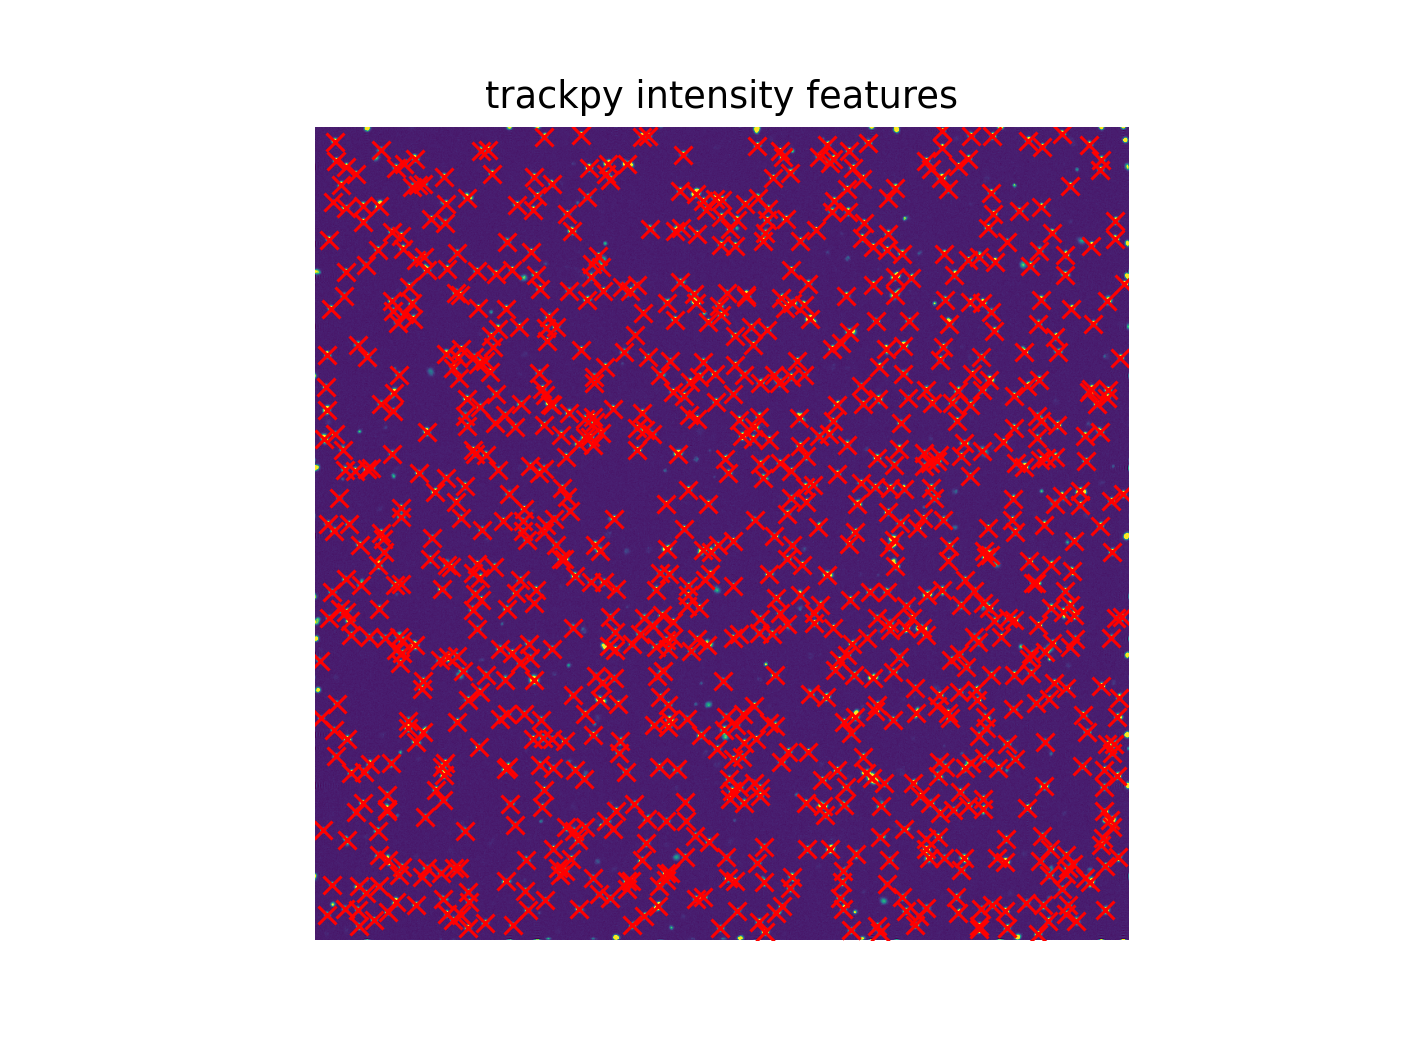

In [5]:
check_peak_locations(imstack, frame_num=50, im_min_inten=80, im_max_inten=350)

Frame 80: 978 features


<IPython.core.display.Javascript object>


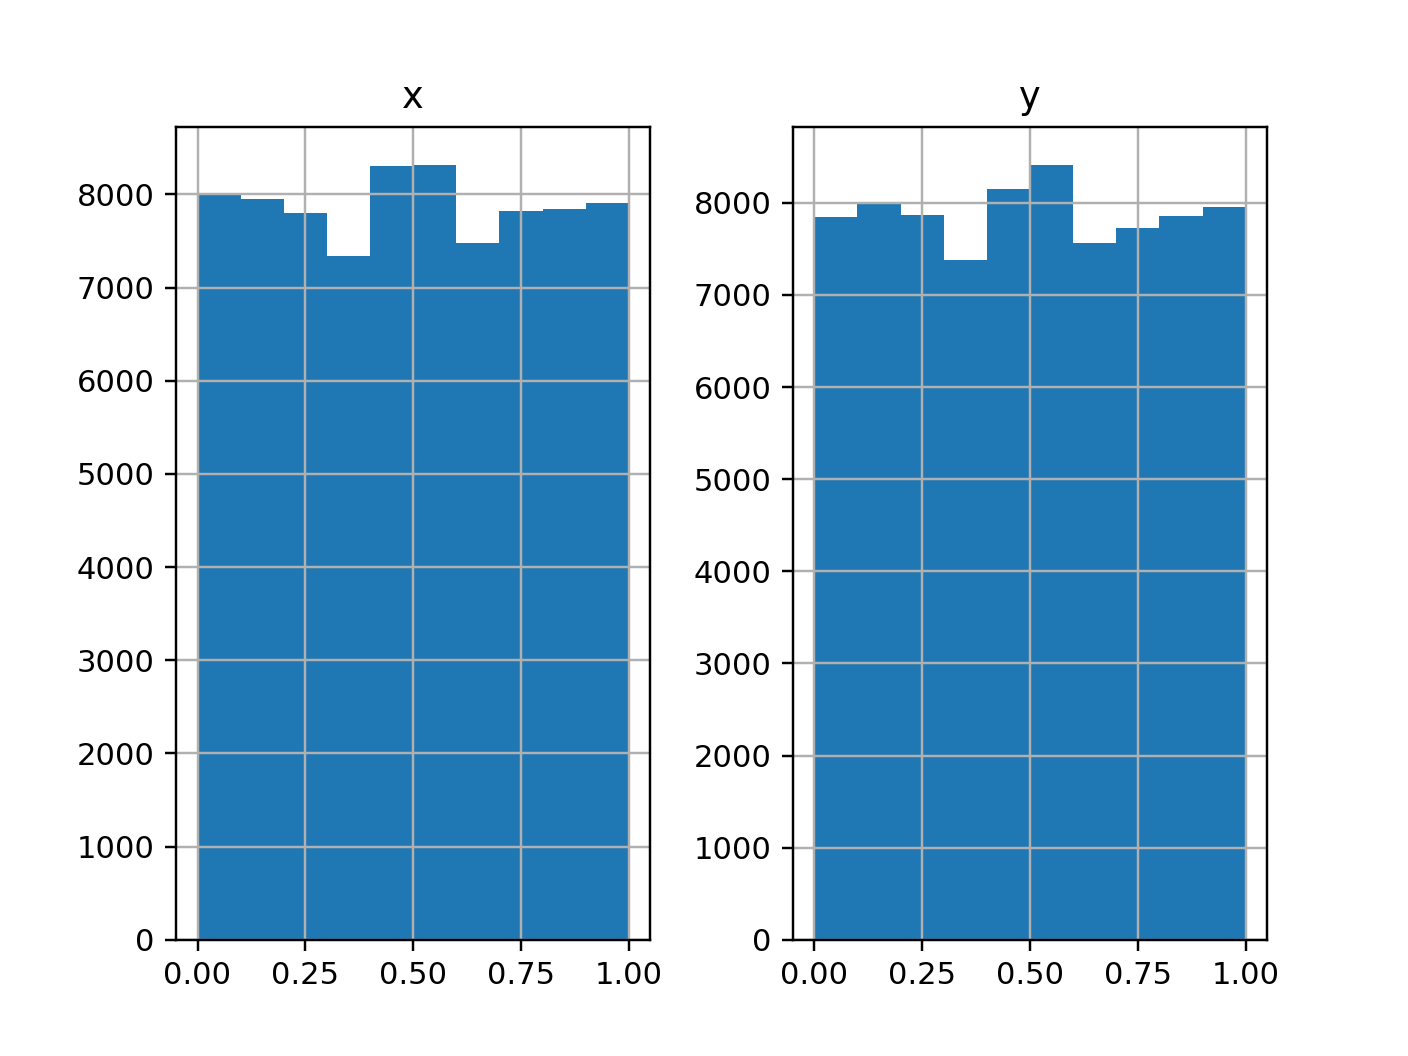

array([[<AxesSubplot: title={'center': 'x'}>,
        <AxesSubplot: title={'center': 'y'}>]], dtype=object)

In [6]:
# find the peaks
all_cells = tp.batch(imstack[:], feature_size, minmass=minmass, separation = separation)

# check whether subpixel accuracy is decent. Should be relatively flat distribution
tp.subpx_bias(all_cells)

In [7]:
# save the particle dataframe
all_cells.to_hdf(filename[:-4] + '_points.h5', key='t_cells', mode='w')

In [8]:
# link tracks
cell_tracks = tp.link_df(all_cells, search_range=max_search_range, adaptive_stop = 5, memory=num_skipped_frames)
# filter based on minimum length
cell_tracks_filtered = tp.filter_stubs(cell_tracks, min_track_length)


Frame 80: 978 trajectories present.


In [9]:
cell_trackdata_df = calculate_track_parameters(cell_tracks_filtered, filename=filename, frame_duration=frame_duration, um_per_pixel=um_per_pixel)

/Users/poakes/Documents/Python_code/tcell_migration/tcell_migration.py:93: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['x', 'y', 'frames'], dtype='object')]

  cell_trackdata_df.to_hdf(filename[:-4] + '_trackdata.h5', key='tracks', mode='w')


<IPython.core.display.Javascript object>


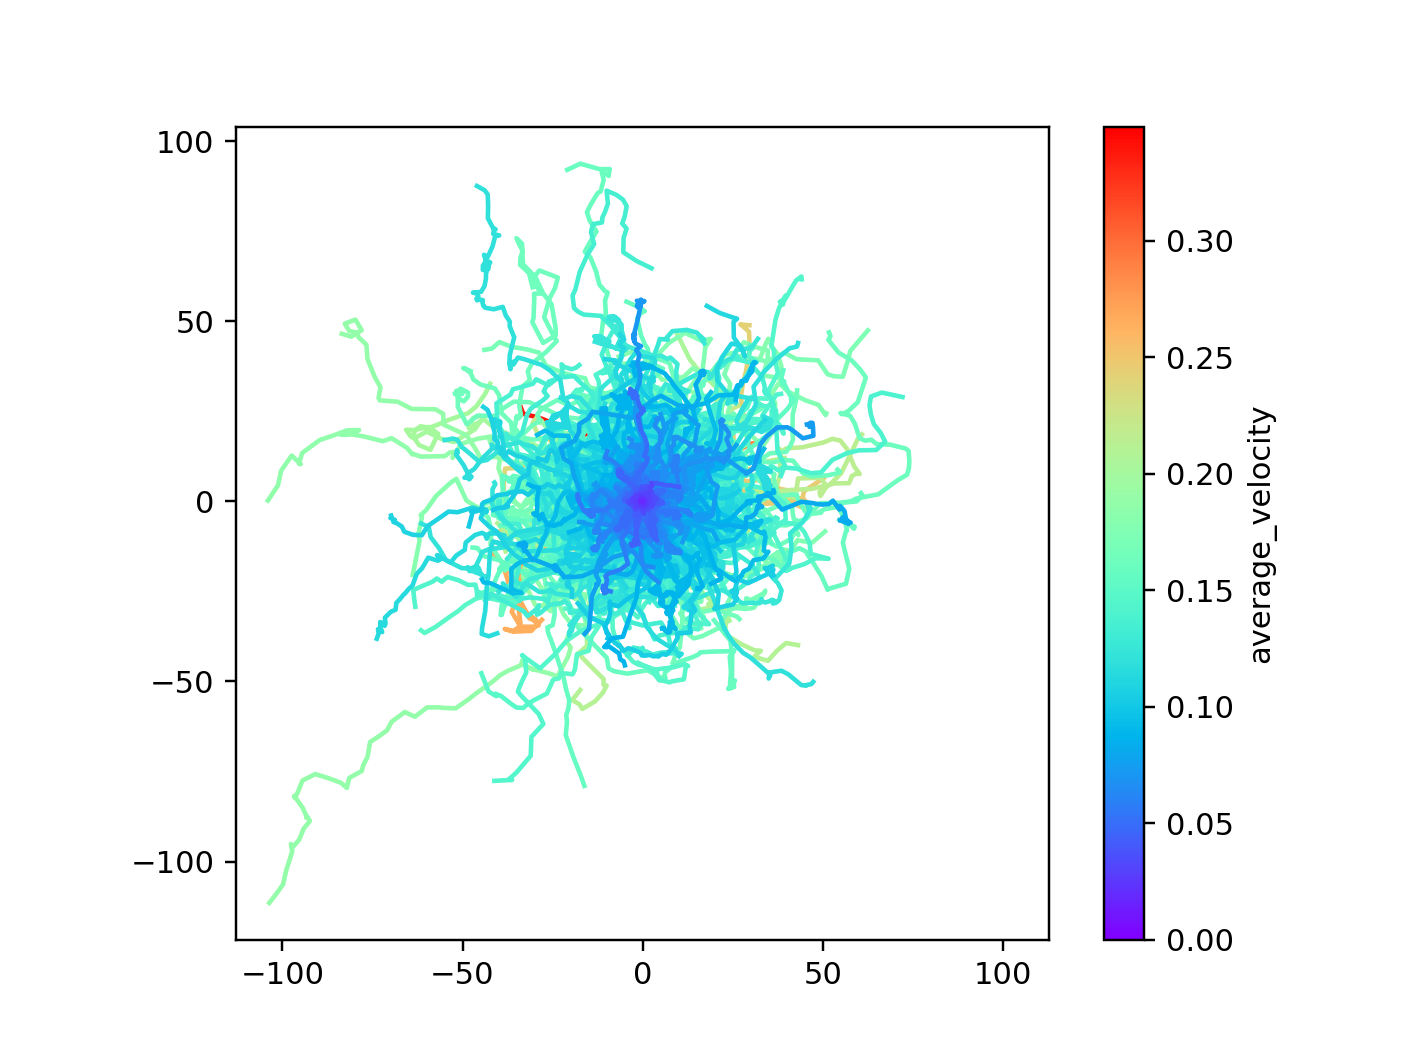

In [10]:
plot_roseplot(cell_trackdata_df, filename, um_per_pixel, color_hue = 'average_velocity')

<IPython.core.display.Javascript object>


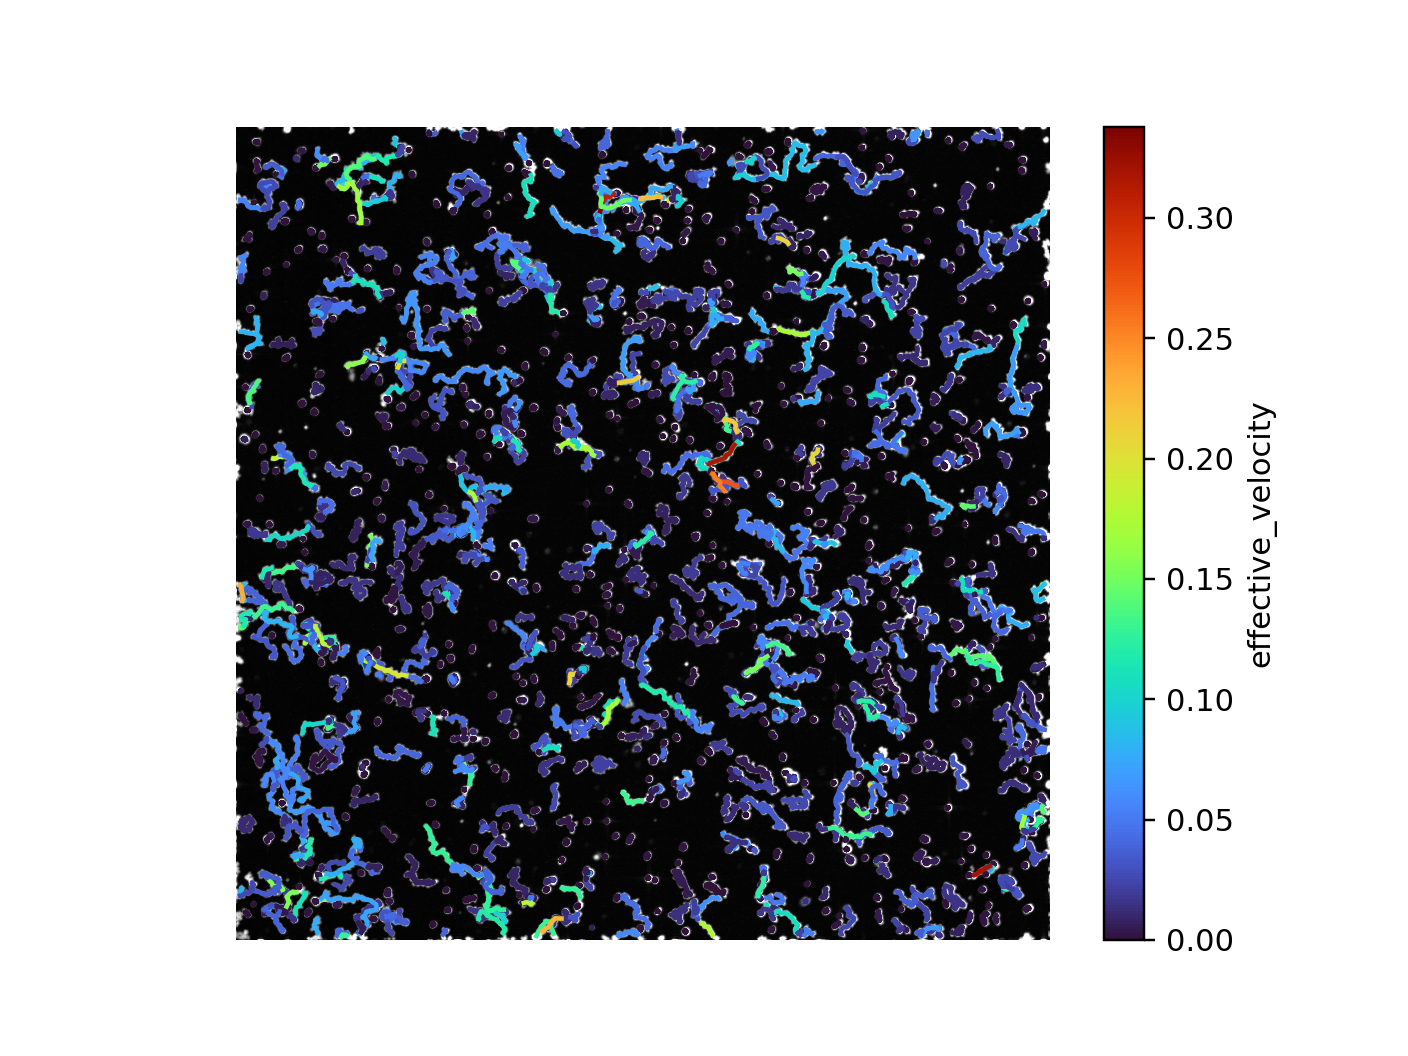

In [11]:
# plot tracks all the same color
# plot_track_overlays(imstack, cell_trackdata_df)

# plot tracks according to a dimension in the dataframe
plot_track_overlays(imstack, cell_trackdata_df, filename = filename, color_hue='effective_velocity')


<IPython.core.display.Javascript object>


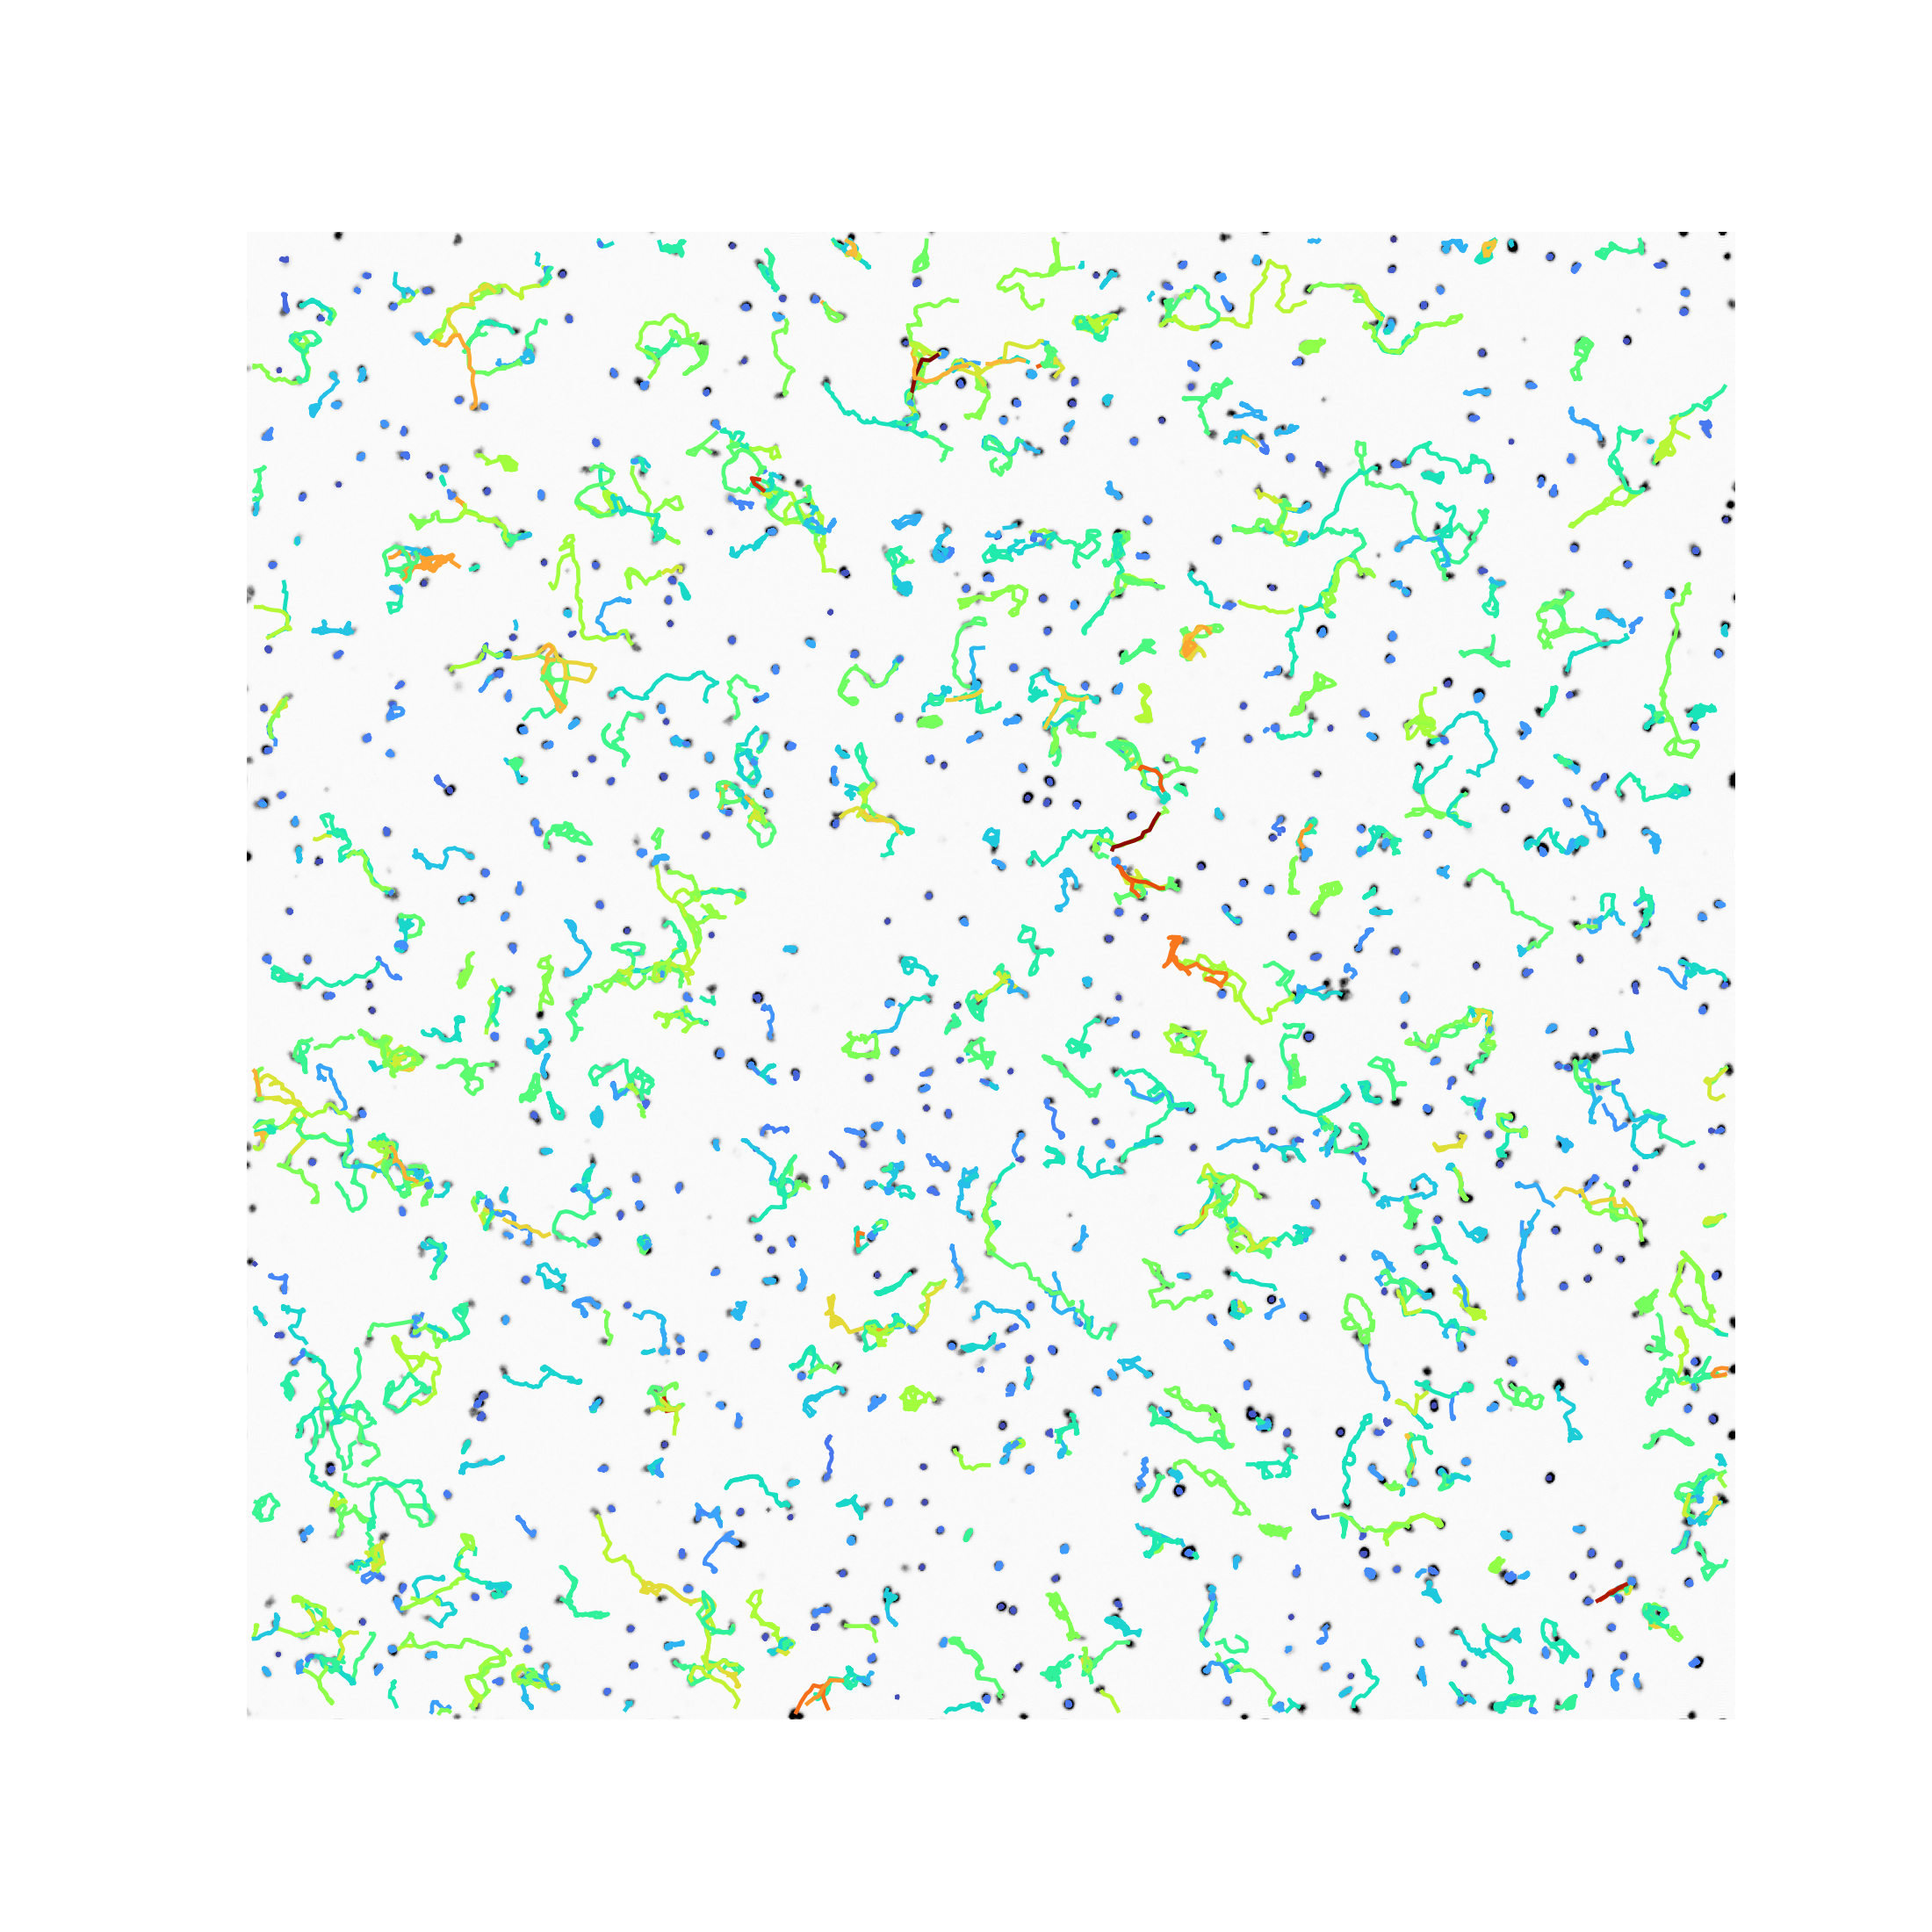

ffmpeg version 5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with clang version 14.0.4
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1666357543514/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=x86_64-apple-darwin13.4.0-clang --cxx=x86_64-apple-darwin13.4.0-clang++ --nm=x86_64-apple-darwin13.4.0-nm --ar=x86_64-apple-darwin13.4.0-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --disable-videotoolbox --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --enable-version3 --enable-zlib --pkg-config=/Users/runner/miniforge3/conda-bld/ffmpeg_16

In [12]:
make_movie_with_overlays(filename, imstack, cell_trackdata_df, im_min_inten=80, im_max_inten=585, color_hue='average_velocity')